# Computer Vision 
# Level 1

#### Kyle Stahl
#### Feb. 2018

## **Introduction**

This analysis will walk through a (relatively) simple computer vision example on the MNIST dataset. If you are unfamililar with the MNIST data, it is a set of thousands of 28x28 pixel black and white images of handwritten numeric digits 0-9. The goal is to teach the computer to be able to recognize the digit that is written in each image. Think of this as what your ATM or mobile phone banking app is doing when you insert, or take a picture of a check. That software will locate the area of the check with the total amount, and then attempt to figure out what that amount is based of the written digits. 

This will require some python programming knowledge. A more complicated version of the same analysis performed in R can be found here: (http://rpubs.com/kstahl/MNIST-1). The Open CV python package is used to import the image data into numpy arrays, then pandas and Scikit-Learn are used for the data maniputlation and modeling. Links to the relavent documentation can be found within the analysis below. This analysis will also require some introductory statistics knowledge. I know some statistics courses cover logistic regression, but some do not. If you need a refresher on what logistic regression is, or if you are thinking that you know what linear regression is, but not _logistic_ watch this video at 1.5 speed: https://www.youtube.com/watch?v=nz-FrbAa8dY. 

In [1]:
# Change directory to where the photos are downloaded
import os
os.chdir("C:\\Users\\kyles\\Downloads\\TrainingSet")

# OpenCV package will be used to bring images in as numpy arrays
import cv2

# Matplotlib used to show the images
from matplotlib import pyplot as plt

# tqdm is used to track the progress of loops
from tqdm import tqdm

# Numpy and pandas for data manipulation
import pandas as pd
import numpy as np

# Scikit-learn for model building
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## **Processing an Image as an Array of Numbers**

We will use the `cv2.imread()` function, which will take an image file, and read the Red, Green, and Blue values into a numpy array pixel by pixel https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_gui/py_image_display/py_image_display.html. When the image is imported, it is stored in a 3-D numpy array. The first two dimensions are the height and width of the pixels of the image. The third dimension has three solts for RGB values 0-255. Since the image is grey scale, all three RGB values are equivalent. A few random pixel values are shown below. 

In [2]:
img = cv2.imread("3/img_9.jpg")
print("Array dimensions: {}".format(img.shape))
print("Some RGB values from randomly selected pixels")
for i in [11,14,17]:
    for j in [9,12,21]:
        print(img[i,j])

Array dimensions: (28, 28, 3)
Some RGB values from randomly selected pixels
[0 0 0]
[154 154 154]
[0 0 0]
[12 12 12]
[8 8 8]
[151 151 151]
[0 0 0]
[16 16 16]
[19 19 19]


Here, I will show you what the picutre looks like with its 28x28 pixels in RGB format. Now hopefully you have a better visualization of what we are working with. 

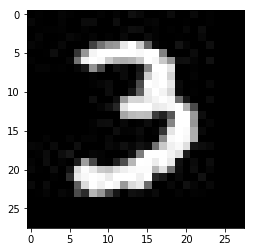

In [3]:
plt.imshow(img)
plt.show()

Since this is just a grey scale image, we do not need all three RGB dimensions, we can just use one color. In other words, we can represent each pixel with one number which will tell how much **white** is in each pixel. Since all of the RGB values are the same for each pixel, we can just average the those for each pixel and it will not change the image. Below, I print out the exact same pixel values and image to show that it is unchanged. 

Array dimensions: (28, 28)
0.0
154.0
0.0
12.0
8.0
151.0
0.0
16.0
19.0


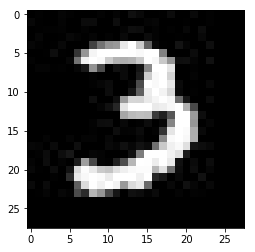

In [4]:
flat = img.mean(axis=2)
print("Array dimensions: {}".format(flat.shape))
for i in [11,14,17]:
    for j in [9,12,21]:
        print(flat[i,j])
        
plt.imshow(flat,cmap='gray')
plt.show()

Finally, we want to flatten the pixels of this image so that it can be organized in a 1 x 784 row, instead of a 28 x 28 matrix. That way we will be able to stack all of the image data in one dataframe. Our training data has 42,000 images, and each image has 784 pixels. So the resulting data frame will be 42,000 rows by 784 columns, and each value will represent the intensity of a pixel.

In [5]:
row = flat.flatten()
print("Array dimensions: {}".format(row.shape))

Array dimensions: (784,)


## **Importing All the Images**

Now we need to import all of the images, and keep track of which images have which digit. I downloaded the pictures in jpg format from https://www.kaggle.com/scolianni/mnistasjpg/data. They are in a folder locally on my computer, and each digit has it's own subfolder. So all of 0's are separated from the 1's and 2's and so on and so forth. 

Below I coded two different ways to import the images. The first looks shorter, it would be considered more of a depth-first-search. It goes into each folder one at a time and imports all of the images from that sub-folder, then it moves on to the next. In other words, it imports all the 0's, then moves onto the 1's, then 2's... and each time it switches folders it tracks what digit it is importing. The second way looks like more lines of code, but executes in a shorter time. It goes image-by-image and looks for each image through all of the folders.

Either way, I found it was much faster to initialize an array of zeros before starting since you already know what the final size is going to be, rather then continuously appending to a dataframe or array. In both cases, we follow the image preprocessing steps above. 

I put progress bars for the loops with the `tqdm` package to be able to visualize the progress https://pypi.python.org/pypi/tqdm. The first method has 10 progress bars because each folder is searched independently, the second only has one because all the folders are being searched at once. 

In [6]:
data = np.zeros([42000,784])
label = []
for i in range(10):
    for j in tqdm(range(42000)):
        img = cv2.imread(str(i) + "/img_" + str(j) + ".jpg")
        if img is not None:
            data[j,:] = img.mean(axis = 2).flatten()
            label.append(i)  
            
# Here there are 10 progress bars because we loop through
# the ten digits individually

100%|██████████████████████████████████████████████████████████████████████████| 42000/42000 [00:11<00:00, 3791.61it/s]


In [7]:
data = np.zeros([42000,784])
label = []
for i in tqdm(range(42000)):
    img = cv2.imread("0/img_" + str(i) + ".jpg")
    if img is not None:
        data[i,:] = img.mean(axis = 2).flatten()
        label.append(0)
        continue
    img = cv2.imread("1/img_" + str(i) + ".jpg")
    if img is not None:
        data[i,:] = img.mean(axis = 2).flatten()
        label.append(1)
        continue
    img = cv2.imread("2/img_" + str(i) + ".jpg")
    if img is not None:
        data[i,:] = img.mean(axis = 2).flatten()
        label.append(2)
        continue
    img = cv2.imread("3/img_" + str(i) + ".jpg")
    if img is not None:
        data[i,:] = img.mean(axis = 2).flatten()
        label.append(3)
        continue
    img = cv2.imread("4/img_" + str(i) + ".jpg")
    if img is not None:
        data[i,:] = img.mean(axis = 2).flatten()
        label.append(4)
        continue
    img = cv2.imread("5/img_" + str(i) + ".jpg")
    if img is not None:
        data[i,:] = img.mean(axis = 2).flatten()
        label.append(5)
        continue
    img = cv2.imread("6/img_" + str(i) + ".jpg")
    if img is not None:
        data[i,:] = img.mean(axis = 2).flatten()
        label.append(6)
        continue    
    img = cv2.imread("7/img_" + str(i) + ".jpg")
    if img is not None:
        data[i,:] = img.mean(axis = 2).flatten()
        label.append(7)
        continue
    img = cv2.imread("8/img_" + str(i) + ".jpg")
    if img is not None:
        data[i,:] = img.mean(axis = 2).flatten()
        label.append(8)
        continue
    img = cv2.imread("9/img_" + str(i) + ".jpg")
    if img is not None:
        data[i,:] = img.mean(axis = 2).flatten()
        label.append(9)
        continue
        
# Now there is only one progress bar because we are searching through all the folders at once.

100%|███████████████████████████████████████████████████████████████████████████| 42000/42000 [01:20<00:00, 522.74it/s]


Now we put the results in a 42,000 x 784 data frame. One row for each image and one column for each pixel. If you are not familiar with data frames, you can check out the official pandas introduction here: https://pandas.pydata.org/pandas-docs/stable/10min.html. Or watch this short video which describes data frames in the R programming language, but the concept is the exact same. https://www.youtube.com/watch?v=9f2g7RN5N0I. Then we print out 10 rows just to see what our data is currently looking like.

In [8]:
Y = pd.Series(label)
X = pd.DataFrame(data)
X.head(10)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,0.0,0.0,3.0,7.0,3.0,0.0,3.0,0.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,2.0,8.0,0.0,0.0,3.0,...,0.0,0.0,13.0,11.0,1.0,6.0,0.0,0.0,0.0,0.0
4,0.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,0.0,2.0,2.0,0.0,0.0,1.0,5.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,4.0,8.0,1.0,0.0,0.0,3.0,0.0,0.0,...,8.0,0.0,0.0,6.0,3.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,2.0,0.0,0.0,5.0,2.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## **Predictive Modeling**

Now that the data is cleaned, we can start modeling. The first step is to split our images into a training and a testing set. We could go through and randomly select images ourselves, but luckily the people who developed scikit-learn made a function to do this for us. Check out how it works here: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html We initialize a random state so we get the same train-test split each time we run it, and I decided on having 60% in the training and 40% in the test set. No real science behind that decision, sometimes you just need to choose something; 70/30 and 80/20 would've worked just as well. Generally, you want more in the training set than the test set, and this training takes a significant amount of time so I chose to have a relatively smaller training set. 

In [9]:
# train test split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.40, random_state=1848)

In [10]:
print("Train Set X variables: {}".format(Xtrain.shape))
print("Train Set Y variables: {}".format(Ytrain.shape))
print("Test Set X variables: {}".format(Xtest.shape))
print("Test Set Y variables: {}".format(Ytest.shape))

Train Set X variables: (29400, 784)
Train Set Y variables: (29400,)
Test Set X variables: (12600, 784)
Test Set Y variables: (12600,)


We are going to train 10 separate logistic regression models. Each one can predict binary 0 or 1 values. Therefore, we need to transform our dependent `Y` variable into 10 different dependent variables, each one containing only 0's and 1's. For example, the variable `sevens` will contain an array of 0's and 1's, a `1` represents that the digit written in that image is a _7_, a `0` would represent any other digit image. And likewise for the other images. 

In [11]:
zeros  = (Ytrain == 0)
ones   = (Ytrain == 1)
twos   = (Ytrain == 2)
threes = (Ytrain == 3)
fours  = (Ytrain == 4)
fives  = (Ytrain == 5)
sixs   = (Ytrain == 6)
sevens = (Ytrain == 7)
eights = (Ytrain == 8)
nines  = (Ytrain == 9)

Next step is to initialize all ten of the models. This doesn't do anything besides create an object that will later be used train, store, and utilize the models. There are many parameters that can be passed for this initialization; I chose to specify a solver that is faster on larger datasets. And a max number of iterations was just set to a realtively large number that did not take to long to run. None of the models converged at this maximum. Check out the documentation for more information. http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html. 

In [12]:
iszero = LogisticRegression(solver = 'saga', max_iter = 1000)
isone = LogisticRegression(solver = 'saga', max_iter = 1000)
istwo = LogisticRegression(solver = 'saga', max_iter = 1000)
isthree = LogisticRegression(solver = 'saga', max_iter = 1000)
isfour = LogisticRegression(solver = 'saga', max_iter = 1000)
isfive = LogisticRegression(solver = 'saga', max_iter = 1000)
issix = LogisticRegression(solver = 'saga', max_iter = 1000)
isseven = LogisticRegression(solver = 'saga', max_iter = 1000)
iseight = LogisticRegression(solver = 'saga', max_iter = 1000)
isnine = LogisticRegression(solver = 'saga', max_iter = 1000)

After we have initialized the models, we can train each model with the training set, and the binary vectors created above. This will find the optimal parameters for each model to predict if an image is a 0, or 3, or 8, or so on...

In [13]:
iszero.fit(Xtrain,zeros)
isone.fit(Xtrain,ones)
istwo.fit(Xtrain,twos)
isthree.fit(Xtrain,threes)
isfour.fit(Xtrain,fours)
isfive.fit(Xtrain,fives)
issix.fit(Xtrain,sixs)
isseven.fit(Xtrain,sevens)
iseight.fit(Xtrain,eights)
isnine.fit(Xtrain,nines)

C:\Users\kyles\.conda\envs\Python3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='saga', tol=0.0001,
          verbose=0, warm_start=False)

Once all the models are trained, we are going to test the results on the test set to find our accuracy. For each observation in the test set, we run the image through all ten models. This will give us the probability that an image is a 0, or 1, or 2 and so on. We organize that information into a 2-D numpy where the probability that the image is a `0` is at the zeroth index, `1` at the first index, all the way up to 9. 

In [14]:
probs = np.array([iszero.predict_proba(Xtest)[:,1], 
                  isone.predict_proba(Xtest)[:,1],
                  istwo.predict_proba(Xtest)[:,1],
                  isthree.predict_proba(Xtest)[:,1],
                  isfour.predict_proba(Xtest)[:,1],
                  isfive.predict_proba(Xtest)[:,1],
                  issix.predict_proba(Xtest)[:,1],
                  isseven.predict_proba(Xtest)[:,1],
                  iseight.predict_proba(Xtest)[:,1],
                  isnine.predict_proba(Xtest)[:,1]]).T

probs.shape

(12600, 10)

This is what we will get for each image. Below is an example for the 73rd image. We can see that most of the probabilities are very very small, except for the number at index 0 which is 0.9999. This gives us a good indication that the image contains a zero. The next smallest number is at the 8th index with a 0.07. This makes sense because 0's and 8's look somewhat similar. 

In [15]:
print(probs[73,:])

[  9.99997637e-01   3.36567381e-18   5.37434716e-04   6.14828265e-08
   6.22878777e-11   1.65356990e-08   1.17201096e-01   1.02919072e-06
   4.21504601e-02   5.21727754e-09]


Then we can print out that image and see it is in fact a zero. 

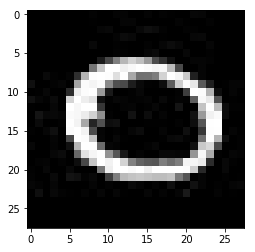

In [16]:
plt.imshow(Xtest.iloc[73,:].values.reshape(28,28),cmap='gray')
plt.show()

Following that logic, we find the index that has the maximum value for each image with the numpy `argmax()` function. This will give us the final prediction for each element in the test set.

In [17]:
predictions = np.argmax(probs, axis = 1)
predictions.shape

(12600,)

Finally we can calculate our accuracy, which we find by taking the total number of predictions that were correct, out of the total number of images in the test set. And we get a final accuracy of 91%

In [18]:
print("The accuracy of the final model is: {}".format((predictions == Ytest).mean().round(4)))

The accuracy of the final model is: 0.9106


### **Next Steps**

This is not so good compared to other algorithms on this problem, but it is a good start. There are a lot of things we did not do in this example to keep things (relatively) simple, but they will be covered in the next tutorial. That can be found here: (http://kyle-stahl-mn.com/computer-vision-2). Some of these step will included: data scaling or normalization, cross validation, and grid search parameter selection. More of the focus will be on the machine learning process, instead of importing the images. We will also explore the relationship between this model, and a simple neural network. 